In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import PillowWriter
from scipy.fft import fft, fftfreq
from mpl_toolkits import mplot3d
import pandas as pd


In [ ]:
def rungeKutta(function_list, initial, step, steps):
  
  # initialize lists
  x = []
  y = []
  z = []
  t = []

  # add initial values to lists
  for i, j in enumerate([t, x, y, z]):
    j.append(initial[i])


  for i in range(steps):

    k1 = []
    k2 = []
    k3 = []
    k4 = []

    for i in function_list:
      k1.append(step * i(x[-1], y[-1], z[-1]))

    for i, j in enumerate(function_list):
      k2.append(step * j(x[-1] + k1[i] / 2, y[-1] + k1[i] / 2, z[-1] + k1[i] / 2))

    for i, j in enumerate(function_list):
      k3.append(step * j(x[-1] + k2[i] / 2, y[-1] + k2[i] / 2, z[-1] + k2[i] / 2))

    for i, j in enumerate(function_list):
      k4.append(step * j(x[-1] + k3[i], y[-1] + k3[i], z[-1] + k3[i]))

    for i, j in enumerate([x, y, z]):
      j.append(j[-1] + (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i]) / 6)
    
    t.append(t[-1] + step)
  
  return t, x, y, z


In [ ]:

def function_x(x, y, z, sigma = 10):
  return sigma * (y - x)

def function_y(x, y, z, r = 28):
  return r * x - y - x * z
  
def function_z(x, y, z, b = 8/3):
  return x * y - b * z

initial = (0, 5, 5, 5)

step = 0.01

steps = 2000

t_list, x_list, y_list, z_list = rungeKutta([function_x, function_y, function_z],
                                            initial, 
                                            step, 
                                            steps)


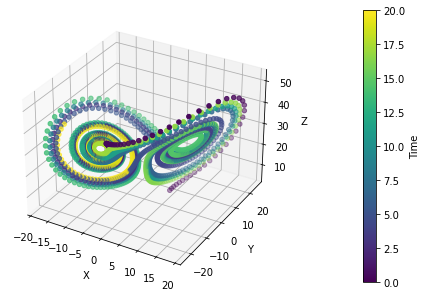

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x_list, y_list, z_list, c=t_list)

# Add color bar
cb = fig.colorbar(p)
cb.set_label("Time")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show plot
plt.show()

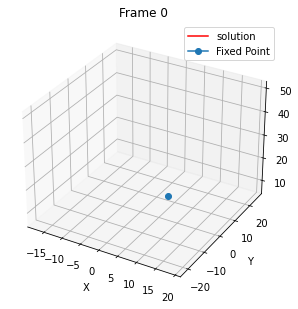

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from PIL import Image


# Set up the figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Define the update function for the animation
def update(frame):
    ax.clear()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Frame {}'.format(frame))
    ax.plot(x_list[:frame], y_list[:frame], z_list[:frame], c='r', label="solution")
    ax.plot(np.sqrt(27), np.sqrt(27), 27/(8/3), marker='o',label='Fixed Point')
    ax.legend()

# Create the animation object
animation = FuncAnimation(fig, update, frames=600, interval=1)

# Save the animation as a .gif file using Pillow
animation.save('3d_plot_animation.gif', writer='pillow')



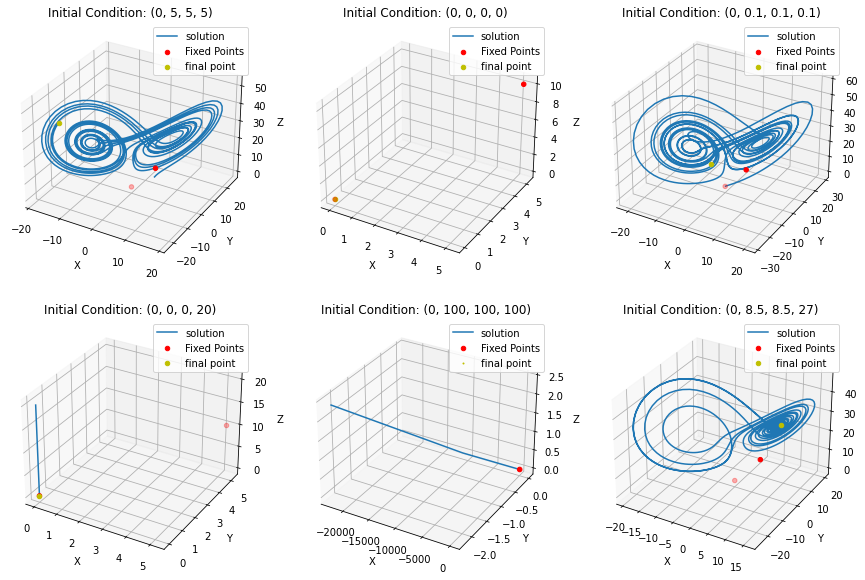

In [ ]:
initial_conditions = [(0,5,5,5),(0,0,0,0), (0,0.1,0.1,0.1), (0,0,0,20),
                      (0,100,100,100), (0, 8.5, 8.5, 27)]

runge_kutta_list = []

for i in initial_conditions:
  runge_kutta_list.append(rungeKutta([function_x, function_y, function_z],
                                            i, 
                                            step, 
                                            steps))

fig = plt.figure(figsize=(15, 10))
for i in range(len(initial_conditions)):
  t_list, x_list, y_list, z_list = runge_kutta_list[i]
  ax = fig.add_subplot(2, 3, i+1, projection='3d')
  ax.plot(x_list, y_list, z_list, label="solution")
  ax.scatter([0, np.sqrt(27)],[0, np.sqrt(27)],[0, 27/(8/3)],
             label="Fixed Points", c='r')
  ax.scatter(x_list[-1], y_list[-1], z_list[-1], label="final point", c='y')
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_zlabel("Z")
  ax.set_title("Initial Condition: " + str(initial_conditions[i]))
  ax.legend()


plt.show()

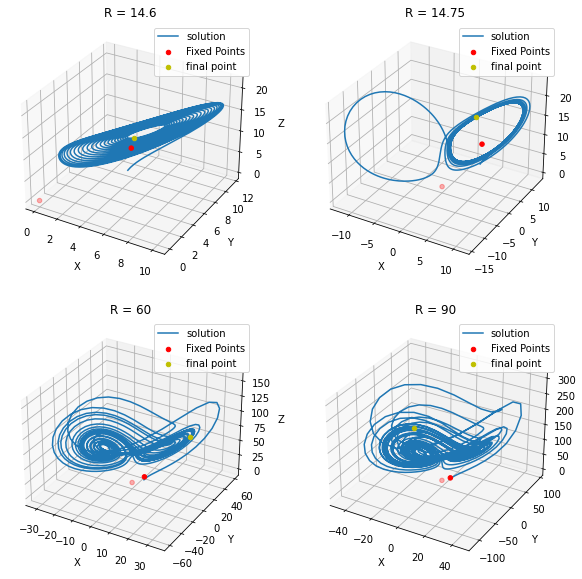

In [ ]:
r = [14.6,14.75,60,90]
initial = [0, 5, 5, 5]

runge_kutta_list = []

for j in r:
  def function_y(x, y, z, r = j):
    return r * x - y - x * z

  runge_kutta_list.append(rungeKutta([function_x, function_y, function_z],
                                            initial, 
                                            step, 
                                            steps))



fig = plt.figure(figsize=(10, 10))

for i in range(len(runge_kutta_list)):
  t_list, x_list, y_list, z_list = runge_kutta_list[i]
  ax = fig.add_subplot(2, 2, i+1, projection='3d')
  ax.plot(x_list, y_list, z_list, label="solution")
  ax.scatter([0, np.sqrt(27)],[0, np.sqrt(27)],[0, 27/(8/3)],
             label="Fixed Points", c='r')
  ax.scatter(x_list[-1], y_list[-1], z_list[-1], label="final point", c='y')
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_zlabel("Z")
  ax.set_title("R = " + str(r[i]))
  ax.legend()


plt.show()

In [ ]:
r = np.linspace(0,30, 100)
initial = [0, 5, 5, 5]

runge_kutta_list = []

for j in r:
  def function_y(x, y, z, r = j):
    return r * x - y - x * z

  runge_kutta_list.append(rungeKutta([function_x, function_y, function_z],
                                            initial, 
                                            step, 
                                            steps))


In [ ]:
x_list = []
for i in range(len(r)):
  x_list.append(runge_kutta_list[i][1][-1])


Text(0, 0.5, 'x value')

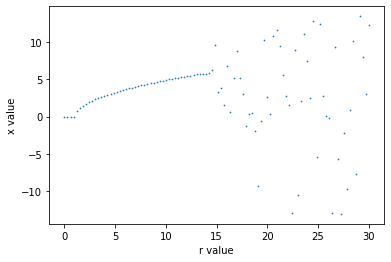

In [ ]:
plt.scatter(r, x_list, s=0.5)
plt.xlabel("r value")
plt.ylabel("x value")

In [ ]:
r = [1, 3, 13, 14.5, 26]
initial = [0, 5, 5, 5]

runge_kutta_list = []

for j in r:
  def function_y(x, y, z, r = j):
    return r * x - y - x * z

  runge_kutta_list.append(rungeKutta([function_x, function_y, function_z],
                                            initial, 
                                            step, 
                                            steps))


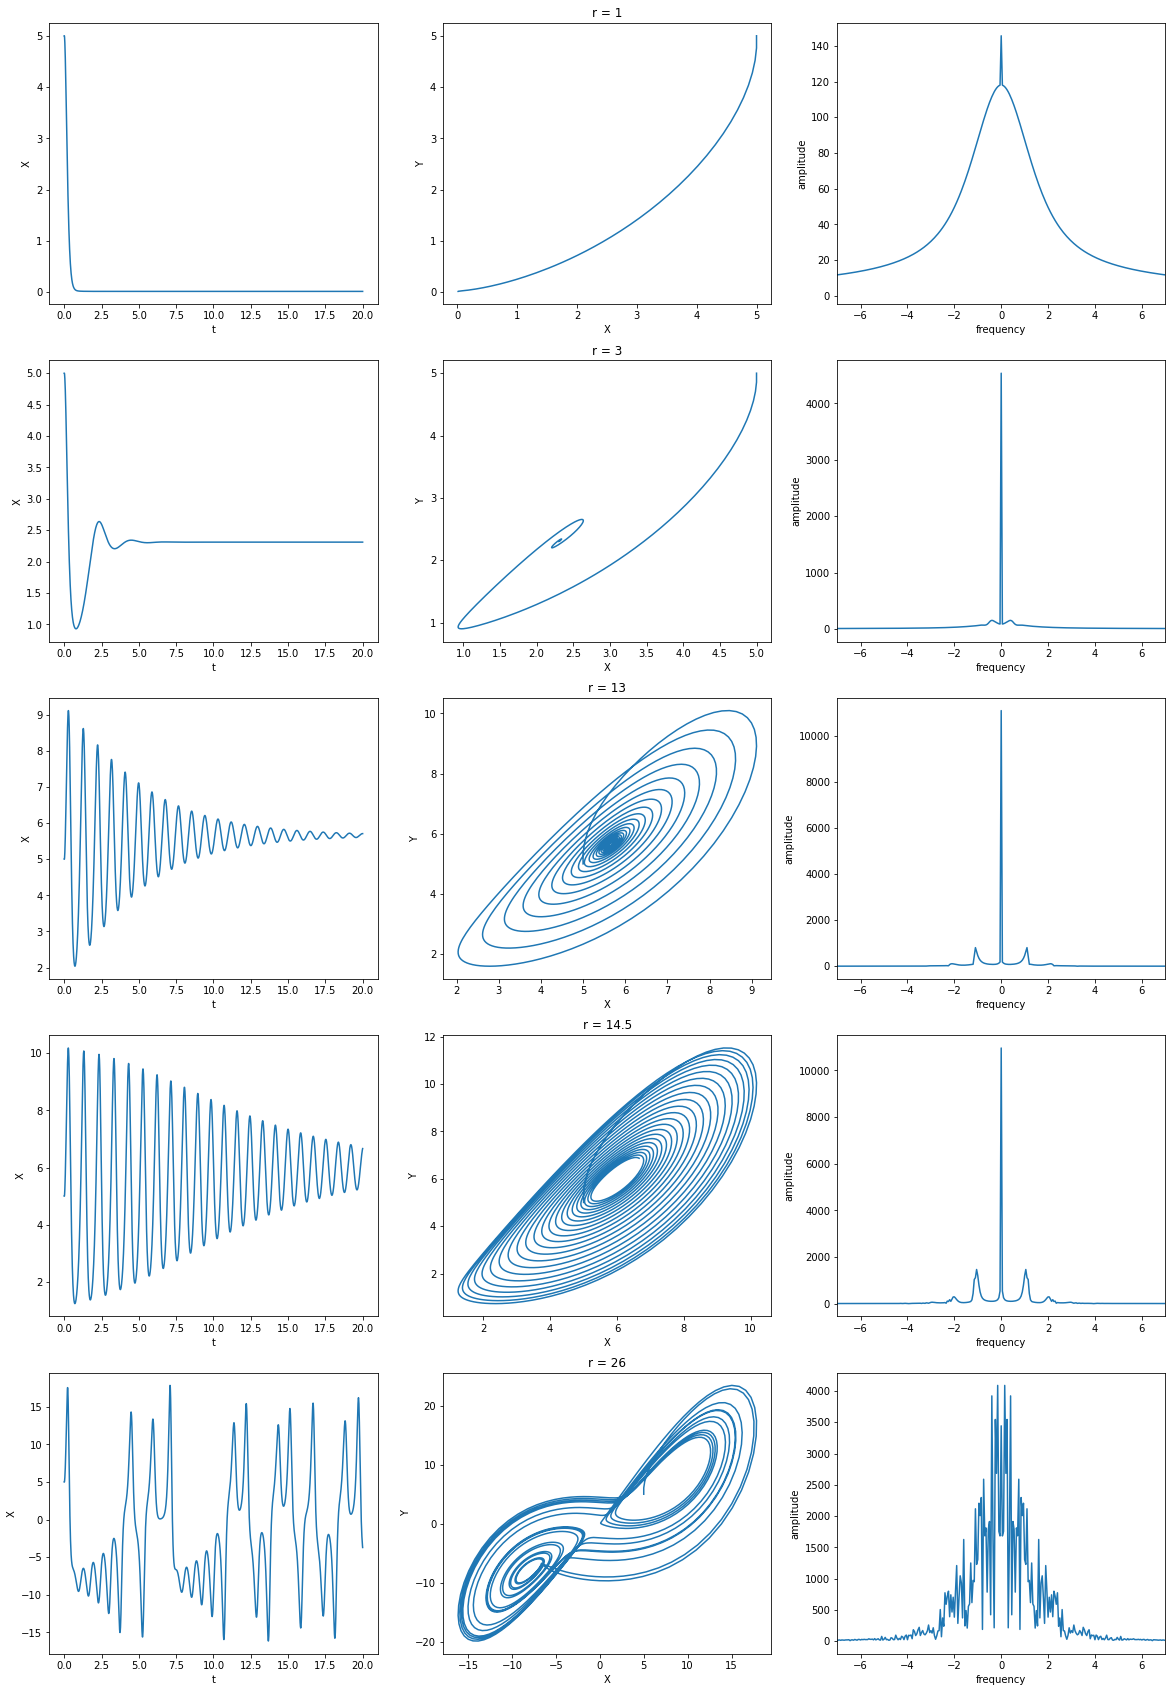

In [ ]:
fig, axes = plt.subplots( len(runge_kutta_list), 3, figsize=(20,30))

for i in range(len(runge_kutta_list)):
  t_list, x_list, y_list, z_list = runge_kutta_list[i]
  freq = fftfreq(len(t_list), t_list[1]-t_list[0])
  args = np.argsort(freq)
  axes[i][0].plot(t_list, x_list)
  axes[i][0].set_xlabel("t")
  axes[i][0].set_ylabel("X")
  axes[i][1].plot(x_list, y_list)
  axes[i][1].set_xlabel("X")
  axes[i][1].set_ylabel("Y")
  axes[i][1].set_title("r = " + str(r[i]))
  axes[i][2].plot(freq[args], np.abs(fft(x_list))[args])
  axes[i][2].set_xlabel("frequency")
  axes[i][2].set_xlim([-7,7])
  axes[i][2].set_ylabel("amplitude")
  
plt.savefig("2_1_1.png")


In [ ]:
rk4_212 = {}

for i, j in enumerate(r):
  rk4_212[j] = [runge_kutta_list[i][0], runge_kutta_list[i][1]]

for i in rk4_212.keys():
  rk4_212[i][0] = fftfreq(len(rk4_212[i][0]), rk4_212[i][0][1]-rk4_212[i][0][0])
  rk4_212[i][1] = fft(rk4_212[i][1])

r_data = []
freq = []
ampl = []
for i in rk4_212.keys():
  r_data.append(np.full(len(rk4_212[i][0]), i))
  freq.append(rk4_212[i][0])
  ampl.append(np.abs(rk4_212[i][1]))

print(len(r_data), len(freq), len(ampl))

5 5 5


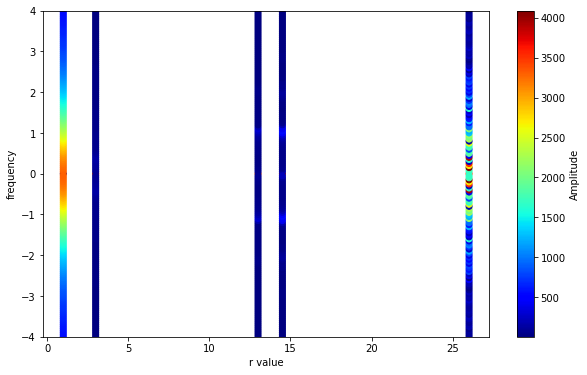

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(len(r_data)):
  plt.scatter(r_data[i], freq[i], c = ampl[i], label = "r=" + str(r[i]), cmap='jet')

plt.xlabel("r value")
plt.ylabel("frequency")
cbar = plt.colorbar()
cbar.set_label("Amplitude")
plt.ylim(-4,4)


plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
solar_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phys581-sunspots.txt",
                         sep="\t", names=["Month", "Number Of Sunspots"])

value = 3143
while (np.sqrt(value) % 10 != 0):
  value +=1

print(solar_data)
print(value)

      Month  Number Of Sunspots
0         0                58.0
1         1                62.6
2         2                70.0
3         3                55.7
4         4                85.0
...     ...                 ...
3138   3138                16.1
3139   3139                19.6
3140   3140                25.2
3141   3141                23.5
3142   3142                21.6

[3143 rows x 2 columns]
3600


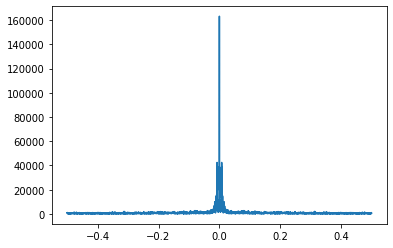

In [ ]:
amp_solar = np.abs(fft(solar_data["Number Of Sunspots"].values, 3600))
freq_solar = fftfreq(len(amp_solar), 1)
args = np.argsort(freq_solar)
plt.plot(freq_solar[args], amp_solar[args])

Text(0, 0.5, '$|c_k|^2$')

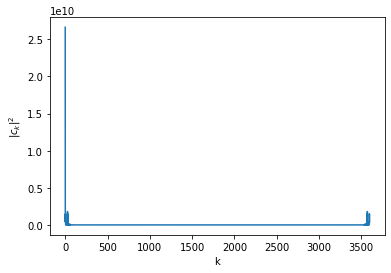

In [ ]:
power_solar = amp_solar**2
plt.plot(range(len(amp_solar)), (power_solar))
plt.xlabel("k")
plt.ylabel("$|c_k|^2$")

In [ ]:
non_zero = [x for x in range(len(power_solar)) if power_solar[x] > 1e8]
print(non_zero)

[0, 1, 2, 3, 4, 6, 7, 14, 21, 25, 26, 27, 28, 29, 30, 32, 34, 35, 37, 55, 3545, 3563, 3565, 3566, 3568, 3570, 3571, 3572, 3573, 3574, 3575, 3579, 3586, 3593, 3594, 3596, 3597, 3598, 3599]


Text(0, 0.5, 'Number of Sunspots')

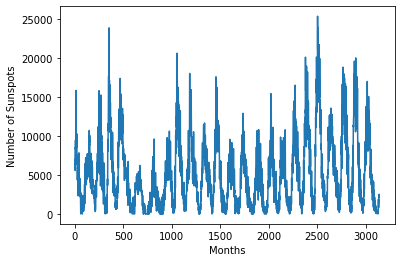

In [ ]:
plt.plot(solar_data["Month"], solar_data["Number Of Sunspots"].values * 100)
plt.xlabel("Months")
plt.ylabel("Number of Sunspots")

In [ ]:
stock_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phys581-stocks.txt", sep="\t")
print(stock_data)

      Date    SANDP  FORD     GM  MICROSOFT    SUN  USTB3M
0   Jan-02  1130.20  0.95  39.55      27.33  17.27    1.73
1   Feb-02  1106.73  0.95  41.40      25.02  17.36    1.75
2   Mar-02  1147.39  0.90  47.23      25.87  18.04    1.77
3   Apr-02  1076.92  0.80  50.12      22.41  15.50    1.78
4   May-02  1067.14  0.76  48.92      21.84  16.14    1.77
..     ...      ...   ...    ...        ...    ...     ...
59  Dec-06  1418.30  4.19  30.26      29.66  61.61    5.04
60  Jan-07  1438.24  4.26  32.34      30.65  62.37    5.05
61  Feb-07  1406.82  4.26  31.63      28.08  63.93    5.13
62  Mar-07  1420.86  4.16  30.38      27.78  69.88    5.15
63  Apr-07  1482.37  4.08  30.97      29.84  74.93    5.05

[64 rows x 7 columns]


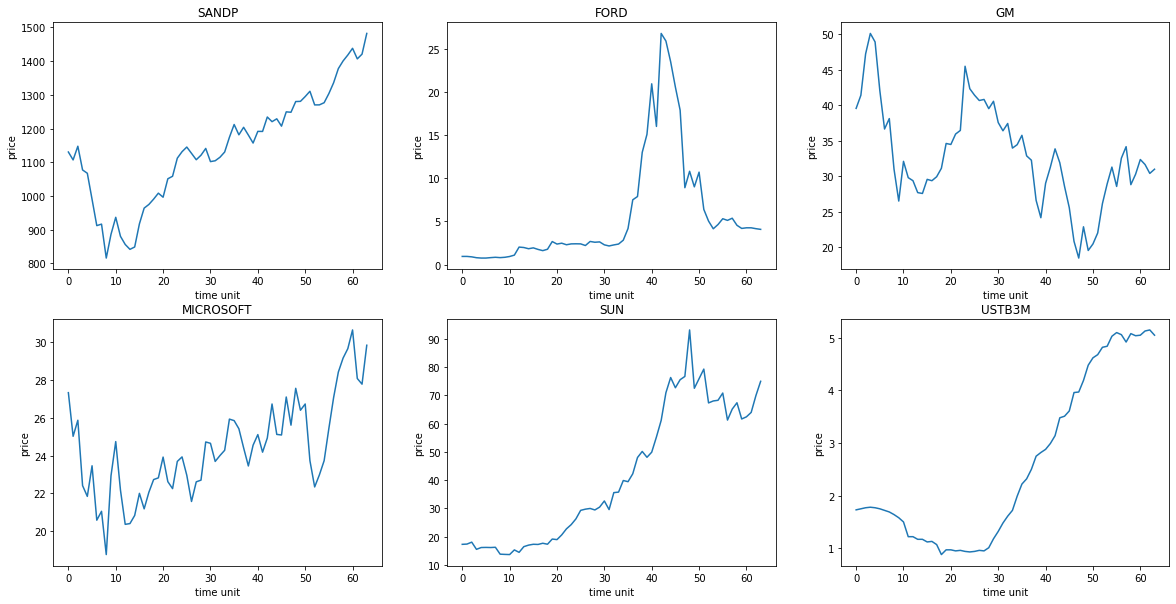

In [ ]:
fig = plt.figure(figsize=(20, 10))

for i in range(1,len(stock_data.columns)):
  ax = fig.add_subplot(2, 3, i)
  ax.plot(stock_data[stock_data.columns[i]])
  ax.set_xlabel("time unit")
  ax.set_ylabel("price")

  ax.set_title(str(stock_data.columns[i]))


In [ ]:
R_list = []
for i in stock_data.columns[1:]:
  temp_data = stock_data[i]
  temp_r = [np.log(temp_data[i+1] / temp_data[i]) for i in range(len(temp_data)-1)]
  R_list.append(temp_r)

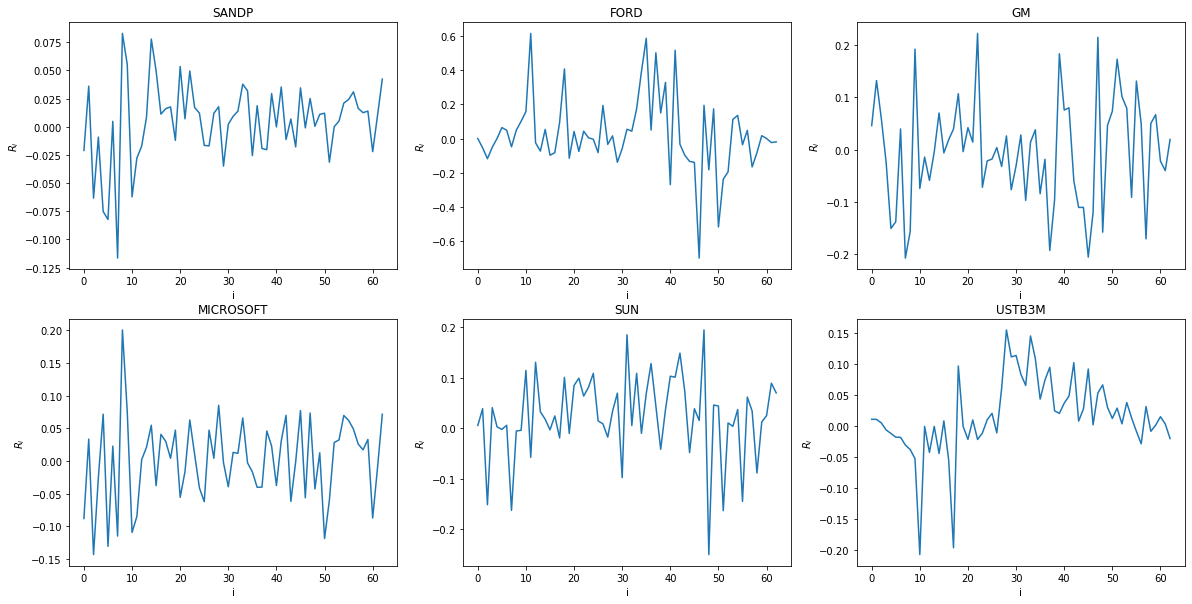

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i in range(len(R_list)):
  ax = fig.add_subplot(2, 3, i+1)
  ax.plot(range(len(R_list[i])), R_list[i])
  ax.set_xlabel("i")
  ax.set_ylabel("$R_i$")
  ax.set_title(stock_data.columns[1:][i])

In [ ]:
correlate_orig = []

for i in stock_data.columns[1:]:
  temp_data = stock_data[i]
  mean = np.mean(temp_data)
  var = np.var(temp_data)
  ndata = temp_data - mean

  acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:]
  acorr = acorr / var / len(ndata)
  correlate_orig.append(acorr)

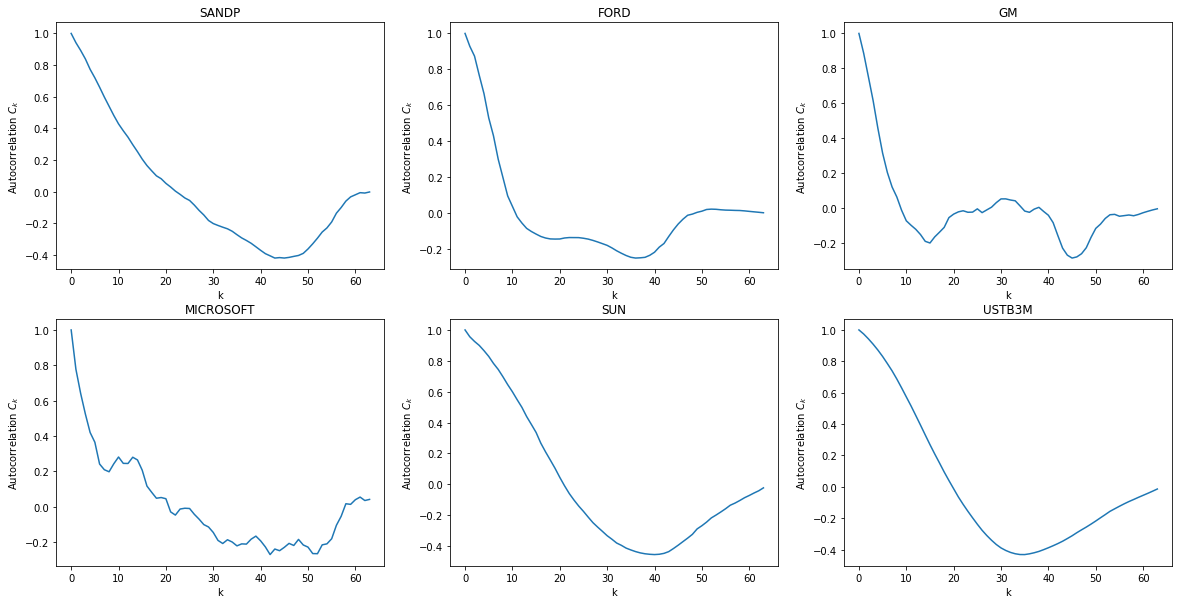

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i in range(len(R_list)):
  ax = fig.add_subplot(2, 3, i+1)
  ax.plot(range(len(correlate_orig[i])), correlate_orig[i])
  ax.set_xlabel("k")
  ax.set_ylabel("Autocorrelation $C_k$")
  ax.set_title(stock_data.columns[1:][i])

In [ ]:
power_stock = []
freq_stock = []

for i in stock_data.columns[1:]:
  temp_data = stock_data[i]
  temp_data = np.abs(fft(temp_data.values))**2
  temp_freq = fftfreq(len(temp_data), 1)

  power_stock.append(temp_data)
  freq_stock.append(temp_freq)

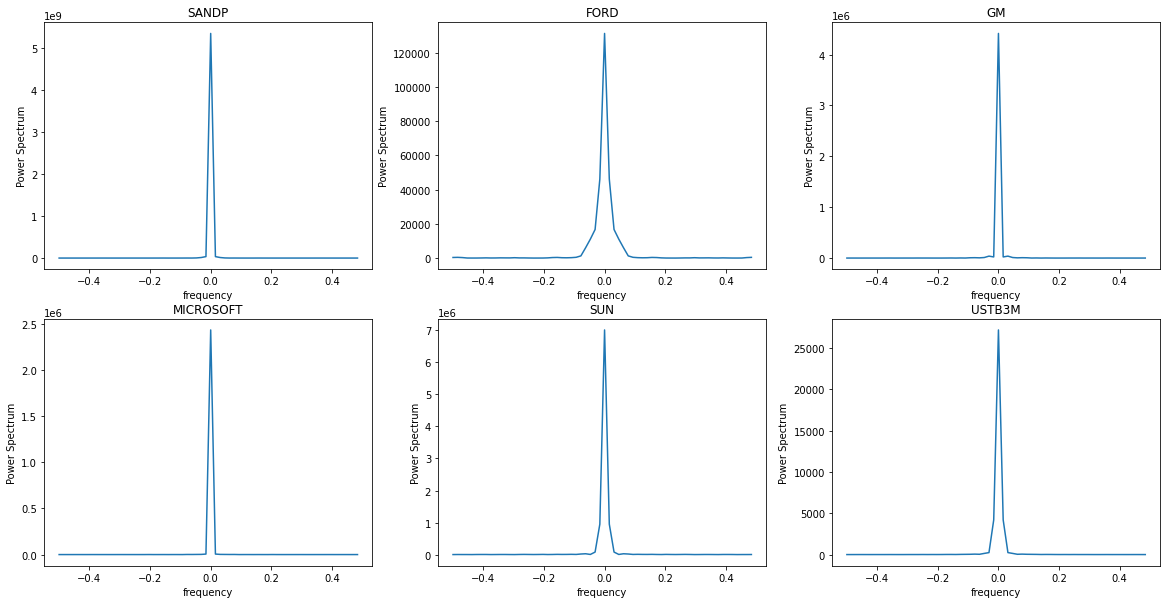

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i in range(len(R_list)):
  ax = fig.add_subplot(2, 3, i+1)
  args = np.argsort(freq_stock[i])
  ax.plot(freq_stock[i][args], power_stock[i][args])
  ax.set_xlabel("frequency")
  ax.set_ylabel("Power Spectrum")
  ax.set_title(stock_data.columns[1:][i])

In [ ]:
dow_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phys581-dow.txt",
                       header=None)


In [ ]:
power_dow = np.abs(fft(dow_data[0].values))**2
freq_dow = fftfreq(len(power_dow), 1)
args = np.argsort(freq_dow)

Text(0, 0.5, 'Amplitude')

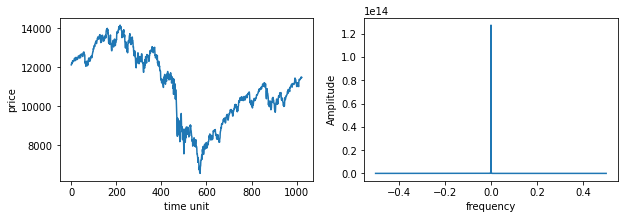

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(10,3))

axes[0].plot(dow_data[0])
axes[0].set_xlabel("time unit")
axes[0].set_ylabel("price")
axes[1].plot(freq_dow[args], power_dow[args])
axes[1].set_xlabel("frequency")
axes[1].set_ylabel("Amplitude")

In [ ]:
temp_data = dow_data[0]
mean = np.mean(temp_data)
var = np.var(temp_data)
ndata = temp_data - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:]
acorr = acorr / var / len(ndata)

Text(0, 0.5, 'Autocorrelation $C_k$')

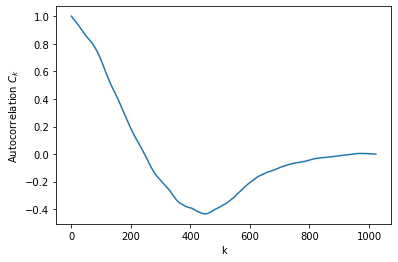

In [ ]:
plt.plot(range(len(acorr)), acorr)
plt.xlabel("k")
plt.ylabel("Autocorrelation $C_k$")

In [ ]:
co_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phys581-co2.txt",sep='\t')

In [ ]:
series = []
for i in range(co_data.shape[0]):
  series.extend(co_data.iloc[i][1:-1])

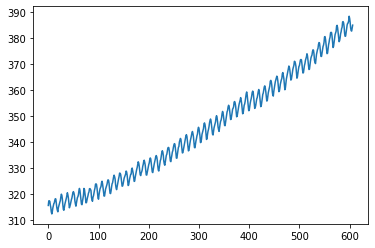

In [ ]:
plt.plot([x for x in series if x >= 0])


Text(0, 0.5, '$CO_2$ Concentration')

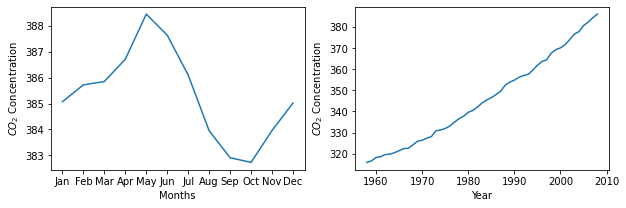

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(10,3))

axes[0].plot(co_data.iloc[-1][1:-1])
axes[0].set_xlabel("Months")
axes[0].set_ylabel("$CO_2$ Concentration")
axes[1].plot(co_data['Year'], co_data['Jul'])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("$CO_2$ Concentration")

In [ ]:
linear_fit = np.polyfit(co_data["Year"].values, co_data["Jul"].values, 1)

def linear_function(t, a= linear_fit[0], b= linear_fit[1]):
  return a * t + b


co_normalized = co_data.copy(deep=True)
for i in co_normalized.columns[1:-1]:
  for j, k in zip(range(co_normalized.shape[0]), co_normalized["Year"].values):
    co_normalized.at[j, i] = co_normalized.at[j, i] - linear_function(k)

Text(0, 0.5, '$CO_2$ Concentration')

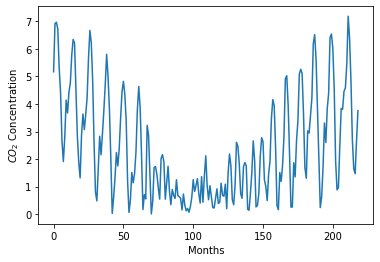

In [ ]:
series = []
for i in range(co_normalized.shape[0]):
  series.extend(co_normalized.iloc[i][1:-1])

series = [x for x in series if x >= 0]
plt.plot(series)
plt.xlabel("Months")
plt.ylabel("$CO_2$ Concentration")

In [ ]:
co_amplitude = np.abs(fft(series))
co_frequency = fftfreq(len(series), 1)
args = np.argsort(co_frequency)

Text(0, 0.5, '')

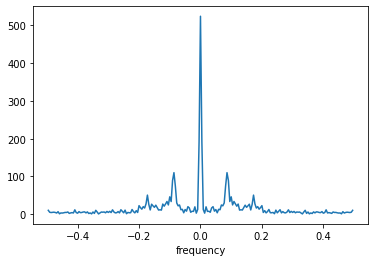

In [ ]:
plt.plot(co_frequency[args], co_amplitude[args])
plt.xlabel("frequency")
plt.ylabel("")

Text(0, 0.5, 'Power Spectrum')

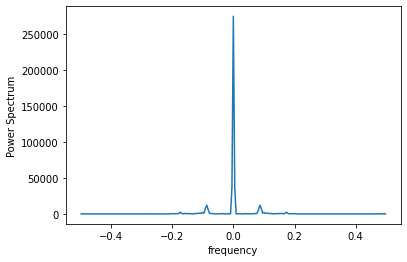

In [ ]:
power_co = co_amplitude**2
plt.plot(co_frequency[args], power_co[args])
plt.xlabel("frequency")
plt.ylabel("Power Spectrum")

In [ ]:
t = [2000]
toxic_values = [linear_function(t[-1])]
while toxic_values[-1] < 7e4:
  t.append(t[-1] + 100)
  toxic_values.append(linear_function(t[-1]))

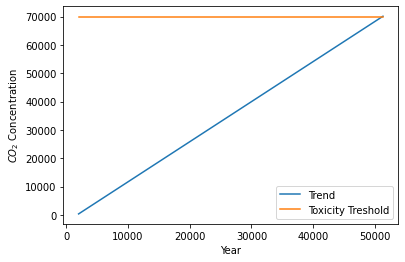

In [ ]:
plt.plot(t, toxic_values, label="Trend")
plt.plot(t, np.full(len(t), 7e4), label="Toxicity Treshold")
plt.xlabel("Year")
plt.ylabel("$CO_2$ Concentration")
plt.legend()